In [1]:
%matplotlib inline

In [2]:
import sklearn

In [3]:
sklearn.__version__

'0.24.1'


# Recognizing hand-written digits

This example shows how scikit-learn can be used to recognize images of
hand-written digits, from 0-9.


In [4]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

Automatically created module for IPython interactive environment


## Digits dataset

The digits dataset consists of 8x8
pixel images of digits. The ``images`` attribute of the dataset stores
8x8 arrays of grayscale values for each image. We will use these arrays to
visualize the first 4 images. The ``target`` attribute of the dataset stores
the digit each image represents and this is included in the title of the 4
plots below.

Note: if we were working from image files (e.g., 'png' files), we would load
them using :func:`matplotlib.pyplot.imread`.



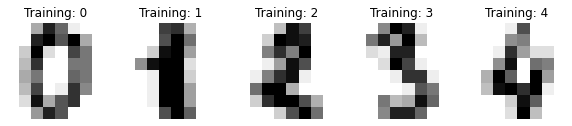

In [5]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

Now let's create a corrupted dataset with splatters.

In [13]:
n_splatters = 8
size_splatters = 2
digits_corrupted = datasets.load_digits()
n_samples = digits_corrupted["data"].shape[0]
digits_corrupted["data"] = digits_corrupted["data"].reshape(n_samples, 8, 8)

In [14]:
import numpy as np
rnds = np.random.randint(0, 8 - (size_splatters - 1), (n_samples, n_splatters, 2))

In [15]:
for i in range(n_samples):
    for isplat in range(n_splatters):
        rnd = [rnds[i, isplat, 0], rnds[i, isplat, 1]]
        digits_corrupted["data"][i, rnd[0]:rnd[0] + size_splatters, rnd[1]:rnd[1]+size_splatters] = 0

In [16]:
digits_corrupted["data"] = digits_corrupted["data"].reshape(n_samples, 64)

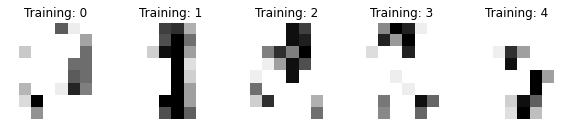

In [17]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, label in zip(axes, digits_corrupted.images, digits_corrupted.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

## Classification

To apply a classifier on this data, we need to flatten the images, turning
each 2-D array of grayscale values from shape ``(8, 8)`` into shape
``(64,)``. Subsequently, the entire dataset will be of shape
``(n_samples, n_features)``, where ``n_samples`` is the number of images and
``n_features`` is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a support
vector classifier on the train samples. The fitted classifier can
subsequently be used to predict the value of the digit for the samples
in the test subset.



**Fit the classifier on initial and corrupted datasets**

In [18]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
# Create a classifier: a support vector classifier
clf1 = svm.SVC(gamma=0.001, probability=True)
# Split data into 50% train and 50% test subsets
X_train_calib1, X_test1, y_train_calib1, y_test1 = train_test_split(
    data, digits.target, test_size=0.2, shuffle=True, random_state=42)
X_train1, X_calib1, y_train1, y_calib1 = train_test_split(
    X_train_calib1, y_train_calib1, test_size=0.25, shuffle=True, random_state=42)
# Learn the digits on the train subset
clf1.fit(X_train1, y_train1)
# Predict the value of the digit on the test subset
predicted1 = clf1.predict(X_test1)

In [19]:
# flatten the images
n_samples = len(digits_corrupted.images)
data = digits_corrupted.images.reshape((n_samples, -1))
# Create a classifier: a support vector classifier
clf2 = svm.SVC(gamma=0.001, probability=True)
# Split data into 50% train and 50% test subsets
X_train_calib2, X_test2, y_train_calib2, y_test2 = train_test_split(
    data, digits.target, test_size=0.2, shuffle=True, random_state=42)
X_train2, X_calib2, y_train2, y_calib2 = train_test_split(
    X_train_calib2, y_train_calib2, test_size=0.25, shuffle=True, random_state=42)
# Learn the digits on the train subset
clf2.fit(X_train2, y_train2)
# Predict the value of the digit on the test subset
predicted2 = clf2.predict(X_test2)

**Visualize some predictions**

Below we visualize the first 4 test samples and show their predicted
digit value in the title.



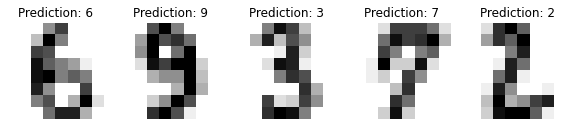

In [20]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test1, predicted1):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

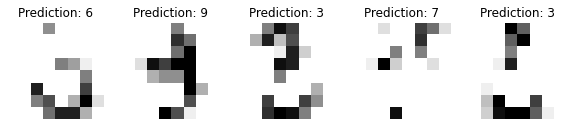

In [21]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test2, predicted2):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

:func:`~sklearn.metrics.classification_report` builds a text report showing
the main classification metrics.



**Evaluate the models**

In [22]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test1, predicted1)}\n")

NameError: name 'clf' is not defined

In [23]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test2, predicted2)}\n")

NameError: name 'clf' is not defined

We can also plot a `confusion matrix <confusion_matrix>` of the
true digit values and the predicted digit values.



In [24]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test1, predicted1)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_predictions'

In [25]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test2, predicted2)
disp.figure_.suptitle("Confusion Matrix")
plt.show();

AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_predictions'

## Prediction sets

In [26]:
from mapie.classification import MapieClassifier
from mapie.metrics import classification_coverage_score

In [27]:
alpha = np.arange(0.01, 1, 0.01)

In [362]:
mapie_clf1 = MapieClassifier(clf1, method="cumulated_score", cv="prefit", random_sets=True)
mapie_clf1.fit(X_calib1, y_calib1)
y_pred1, y_ps1 = mapie_clf1.predict(X_test1, alpha=alpha)

In [363]:
mapie_clf2 = MapieClassifier(clf2, method="cumulated_score", cv="prefit", random_sets=True)
mapie_clf2.fit(X_calib2, y_calib2)
y_pred2, y_ps2 = mapie_clf2.predict(X_test2, alpha=alpha)

In [364]:
coverages1 = [classification_coverage_score(y_test1, y_ps1[:, :, ia]) for ia, _ in enumerate(alpha)]
coverages2 = [classification_coverage_score(y_test2, y_ps2[:, :, ia]) for ia, _ in enumerate(alpha)]
widths1 = [y_ps1[:, :, ia].sum(axis=1).mean() for ia, _ in enumerate(alpha)]
widths2 = [y_ps2[:, :, ia].sum(axis=1).mean() for ia, _ in enumerate(alpha)]

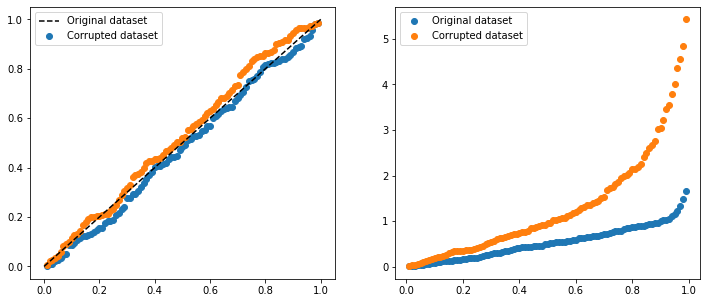

In [365]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
axes[0].scatter(1-alpha, coverages1)
axes[0].scatter(1-alpha, coverages2)
axes[0].plot([0, 1], [0, 1], ls="--", color="k")
axes[0].legend(["Original dataset", "Corrupted dataset"])
axes[1].scatter(1-alpha, widths1)
axes[1].scatter(1-alpha, widths2)
axes[1].legend(["", "Original dataset", "Corrupted dataset"])

In [334]:
y_ps_label1 = [[np.argwhere(y_ps1[isample, :, ialpha]) for ialpha, _ in enumerate(alpha)] for isample in range(len(y_test1))]
y_ps_label2 = [[np.argwhere(y_ps2[isample, :, ialpha]) for ialpha, _ in enumerate(alpha)] for isample in range(len(y_test2))]

In [373]:
np.array(y_ps_label1[0][0]).ravel()

array([6])

TypeError: list indices must be integers or slices, not tuple

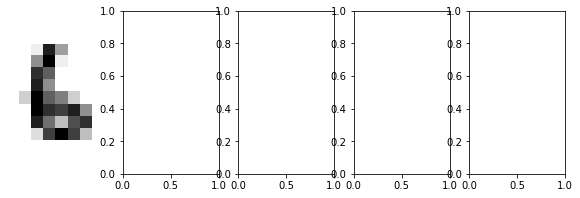

In [367]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
num_images = np.random.randint(0, len(y_test2), 5)
# for ax, image, prediction in zip(axes, X_test1[num_images, :], y_ps_label1[num_images, 0]):
for i, ax in enumerate(axes):
    ax.set_axis_off()
    image = X_test1[num_images[i], :].reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    print(np.array(y_ps_label1[num_images[i], 0]).ravel())
    ax.set_title(f'Prediction:\n {np.array(y_ps_label1[num_images[i], 0]).ravel()}')
# for ax, image, prediction in zip(axes, X_test2[num_images, :], y_ps_label2[num_images, 0]):
#     ax.set_axis_off()
#     image = image.reshape(8, 8)
#     ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
#     ax.set_title(f'Prediction:\n {np.array(prediction).ravel()}')